In [1]:
# -*- coding: utf-8 -*-
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot
import random

In [7]:
def get_datatrain():
    data = load_svmlight_file("C:/Users/Administrator/Desktop/a9a.txt")
    input_data = data[0].toarray()
    return input_data, data[1]
def get_datatest():
    data = load_svmlight_file("C:/Users/Administrator/Desktop/a9a.t")
    input_data = data[0].toarray()
    return input_data, data[1]
def sigmoid(w, X):
    return 1.0/(1.0+np.e**(-np.dot(X, w)))
def draw(Losstesting, algorithm, show=False):
    x = np.array(range(1, len(Losstesting)+1))
    plot.figure(0)
    plot.plot(x, np.array(Losstesting), label=algorithm)
    if show==True:
        plot.xlabel("iternum")
        plot.ylabel("Loss")
        plot.title("LogisticRegression")
        plot.grid(True)
        plot.legend()
        plot.show()

In [8]:
x_train, y_train = get_datatrain()
x_test, y_test = get_datatest()
batchsize=5000
iternum=100
learnrate=0.01
D=123
temp = np.zeros((len(x_test), 1))
x_test = np.column_stack((x_test, temp))
y_train[y_train==-1] = 0
y_test[y_test==-1] = 0

trainlie = np.ones((len(x_train), 1))
x_train = np.column_stack((x_train, trainlie))
testlie = np.ones((len(x_test), 1))
x_test = np.column_stack((x_test, testlie))

algorithm = ['SGD', 'NAG', 'RMSProp', 'Adadelta', 'Adam']

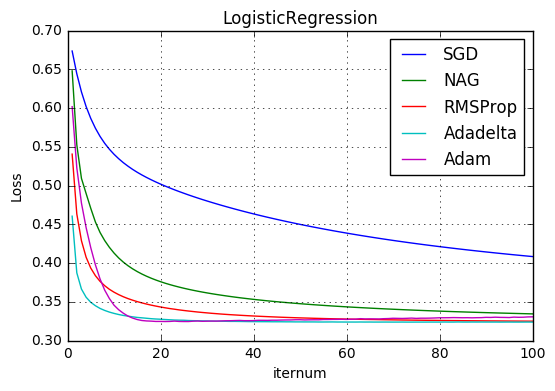

In [9]:
for a in range(len(algorithm)):
    w = np.zeros((D+1, 1))
    Losstrain = []
    Losstest = []
    batchnum = int(len(x_train)/batchsize + 1)
    vtl = np.zeros((D+1, 1))
    gtl = np.zeros((D+1, 1))
    deltatl = np.zeros((D+1, 1))
    vtl_a = np.zeros((D+1, 1))
    mtl = np.zeros((D+1, 1))

    for i in range(iternum):
        Losstraining = 0.0
        Losstesting = 0.0
        suiji = random.sample(range(len(x_train)), len(x_train))
        for j in range(batchnum):
            if j!=batchnum-1:
                x = x_train[suiji[j*batchsize:(j+1)*batchsize]]
                y = y_train[suiji[j*batchsize:(j+1)*batchsize]]
            elif j==batchnum-1:
                x = x_train[suiji[j*batchsize:]]
                y = y_train[suiji[j*batchsize:]]
            if algorithm[a]=="SGD":
                gradient = (np.dot(np.transpose(x), (sigmoid(w, x) - y.reshape(-1, 1))))/len(x)
                w = w - learnrate * gradient
            elif algorithm[a]=="NAG":
                gradient = (np.dot(np.transpose(x), (sigmoid((w-0.9*vtl), x) - y.reshape(-1, 1))))/len(x)
                vt = 0.9*vtl + learnrate * gradient
                w = w - vt
                vtl = vt.copy()
            elif algorithm[a]=="Adadelta":
                gradient = (np.dot(np.transpose(x), (sigmoid(w, x) - y.reshape(-1, 1))))/len(x)
                gt = gradient.copy()
                gt = 0.1 * np.square(gtl) + 0.9 * np.square(gt)
                deltaw = (np.sqrt(np.mean(deltatl)+0.001)/np.sqrt(np.mean(gt)+0.001))*gradient
                w = w - deltaw
                deltat = 0.9 * deltatl + 0.1 * np.square(deltaw)
                deltatl = deltat.copy()
            elif algorithm[a]=="RMSProp":
                gradient = (np.dot(np.transpose(x), (sigmoid(w, x) - y.reshape(-1, 1))))/len(x)
                gt = gradient.copy()
                gt = 0.1 * np.square(gtl) + 0.9 * np.square(gt)
                w = w - (learnrate*gradient)/np.sqrt(np.mean(gt)+0.001)
                gtl = gt.copy()
            elif algorithm[a]=="Adam":
                gradient = (np.dot(np.transpose(x), (sigmoid(w, x) - y.reshape(-1, 1))))/len(x)
                mt = 0.9 * mtl + 0.1 * gradient
                vta = 0.999 * vtl_a + 0.001 * np.square(gradient)
                mthat = mt / ( 1 - np.power(0.9, i*batchnum+j+1))
                vtahat = vta / ( 1 - np.power(0.999, i*batchnum+j+1))
                w = w - learnrate * mthat / (np.sqrt(vtahat) + 1e-8)
                mt = mthat
                vta = vtahat
            Losstraining += -np.mean(y_train.reshape(-1, 1) * np.log(sigmoid(w, x_train)) + (1 - y_train.reshape(-1, 1)) * (np.log(1 - sigmoid(w, x_train))))
            Losstesting += -np.mean(y_test.reshape(-1, 1) * np.log(sigmoid(w, x_test)) + (1 - y_test.reshape(-1, 1)) * (np.log(1 - sigmoid(w, x_test))))
        Losstraining = Losstraining/batchnum
        Losstesting = Losstesting/batchnum
        Losstrain.append(Losstraining)
        Losstest.append(Losstesting)
    if a==len(algorithm)-1:
        draw(Losstest, algorithm[a], True)
    else:
        draw(Losstest, algorithm[a], False)